<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Alessandro Gaballo 
<b> Student 2:</b> Jonas Wacker
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 

To generate your final report, use print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by April 7th 2017. 

# Introduction


In this session, your will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyper parameters. You will use the MNIST dataset which was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get restults. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command : 
from filename import *

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays.

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots
 








# Section 1 :  My First Neural Network


<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the above Neural network with two inputs $X=(x1,x2)$, one hidden layers and a single output unit $(y)$.
The initial weights are set to random values. Neurons 6 and 7 represent the bias. Bias values are equal to 1.  
Training sample, X = (0.8, 0.2), whose class label is Y=0.4.

Assume that the neurons have a Sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$ and the learning rate $\mu$=1


<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$.

#Your answer goes here :

$w_{1,3}=  0.3043 $ 

$w_{1,4}=  -0.5027 $

$w_{2,3}= 0.8011 $

$w_{2,4}= 0.1993 $

$w_{6,3}= 0.2054 $

$w_{6,4}= -0.4034 $

$w_{3,5}= 0.6254 $

$w_{4,5}= 0.3875 $

$w_{7,5}= 0.4606 $




<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py </a> file) and reinitialise weights. 
Then you will to complete the Feed Forward and the Back-propagation functions. 

<b>Question 1.2.1</b>: Define the neural network corresponding to the one in part 1

In [9]:
from NeuralNetwork import *
import numpy as np
#create the network
my_first_net = NeuralNetwork(2, 2, 1, learning_rate=1)


In [12]:
#Data preparation 
X=[0.8,0.2]
Y=[0.4]
data=[]
data.append(X)
data.append(Y)

#initialize weights
wi=np.array([[0.3,-0.5],[0.8,0.2],[0.2,-0.4]])
wo=np.array([[-0.6],[0.4],[0.5]])
my_first_net.weights_initialisation(wi,wo)
print(my_first_net.W_input_to_hidden)
print(my_first_net.W_hidden_to_output)

[[ 0.3 -0.5]
 [ 0.8  0.2]
 [ 0.2 -0.4]]
[[-0.6]
 [ 0.4]
 [ 0.5]]


<b>Question 1.2.2</b>: Implement the Feed Forward function (feedForward(X) in the NeuralNetwork.py file)



In [3]:
# Implement it in the NeuralNetwork.py file and when finalised copy and paste your FeedForward function here
def transfer_function(self, x):
    return 1.0 / (1.0 + np.exp(-x))
    
def feedForward(self, inputs):
    self.a_input = np.append(inputs, 1)
    a_hidden_without_bias = np.dot(self.a_input, self.W_input_to_hidden)
    self.a_hidden = np.append(a_hidden_without_bias, 0)
    self.o_hidden = self.transfer_function(self.a_hidden)
    self.o_hidden[-1] = 1
    self.a_output = np.dot(self.o_hidden, self.W_hidden_to_output)
    self.o_output = self.transfer_function(self.a_output)
    return self.o_output


Check your network outputs the expected value (the one you computed in question 1.1)

In [13]:
#test my  Feed Forward function 
Output_activation=my_first_net.feedForward(X)
print("output activation =%.3f" %(Output_activation))


output activation =0.560


<b>Question 1.2.3</b>: Implement the Back-propagation Algorithm (backPropagate(Y) in the NeuralNetwork.py file)  


In [5]:
# Implement it in the NeuralNetwork.py file and when finalised copy and paste your BackPropagate function here
def backPropagate(self, targets):
        
    # calculate error terms for output
    self.errors = self.o_output - targets
    delta_e_u_output = self.errors * self.o_output * (1 - self.o_output)
    delta_e_u_horizontal = np.matrix(delta_e_u_output)
    o_hidden_vertical = np.matrix(self.o_hidden).T
        
    delta_e_w_output = np.dot(o_hidden_vertical, delta_e_u_horizontal)

    # calculate error terms for hidden
    delta_e_u_hidden = np.dot(self.W_hidden_to_output, delta_e_u_output) * self.o_hidden * (1 - self.o_hidden)
    delta_e_u_horizontal = np.matrix(delta_e_u_hidden)
    o_input_vertical = np.matrix(self.a_input).T
    delta_e_w_hidden = np.dot(o_input_vertical, delta_e_u_horizontal)
    # delete last column
    # delta_e_w_hidden = delta_e_w_hidden[:,0:delta_e_w_hidden.shape[1]-1]
    delta_e_w_hidden = np.delete(delta_e_w_hidden, -1, 1)
    # update output weights
    self.W_hidden_to_output -= self.learning_rate * delta_e_w_output
    # update input weights
    self.W_input_to_hidden -= self.learning_rate * delta_e_w_hidden
        
    return np.square(self.errors).sum()/2


Check the gradient values and weight updates are correct (similar to the ones you computed in question 1.1)

In [14]:
#test my  Back-propagation function
my_first_net.backPropagate(Y)
#Print weights after backpropagation
print('New input weights\n', my_first_net.W_input_to_hidden)
print('New output weights\n', my_first_net.W_hidden_to_output)

New input weights
 [[ 0.30432265 -0.50273473]
 [ 0.80108066  0.19931632]
 [ 0.20540332 -0.40341841]]
New output weights
 [[-0.62541468]
 [ 0.38745727]
 [ 0.46063746]]


Your Feed Forward and Back-Propagation implementations are working, Great!! Let's tackle a real world problem.

# Section 2 : The MNIST Challenge! 

<b>Data Preparation</b>

The MNIST dataset consists of handwritten digit images it contains 60,000 examples for the training set and 10,000 examples for testing. In this Lab Session, the official training set of 60,000 is divided into an actual training set of 50,000 examples, 10,000 validation examples and 10,000 examples for test. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. The images are stored in byte form you will use the NumPy python library to read the data files into NumPy arrays that we will use to train the ANN.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the the load_data() function.


In [2]:
from utils import *
training_data, validation_data, test_data=load_data()

Loading MNIST data .....
Done.


<b>MNIST Dataset Digits Visualisation</b>

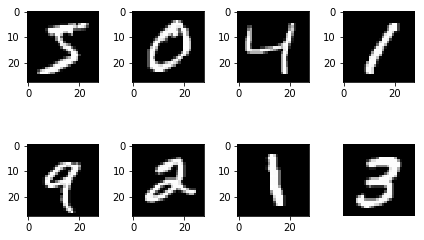

In [3]:
ROW = 2
COLUMN = 4
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = training_data[i][0].reshape(28, 28)
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()



<b>Part 1</b>: Creating the Neural Networks

The input layer of the neural network contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits, and so the input layer contains 784=28×28 neurons. The second layer of the network is a hidden layer, we set the neuron number in the hidden layer to 30. The output layer contains 10 neurons. 

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class

In [4]:
#create the network
from NeuralNetwork import NeuralNetwork 

input_nodes = 784
hidden_nodes = 30
output_nodes = 10

my_mnist_net = NeuralNetwork(input_nodes, hidden_nodes, output_nodes)


<b>Question 2.1.2</b>: Add the information about the performance of the neural network on the test set at each epoch

In [5]:
test_accuracy=my_mnist_net.predict(test_data) / 100

In [6]:
print('Test_Accuracy [epoch = 0]  %-2.2f' % test_accuracy)

Test_Accuracy [epoch = 0]  10.09


<b>Question 2.1.3</b>: Train the Neural Network and comment your findings

Iteration:  1/50[==============] -Error: 0.1123316059  -Training_Accuracy:  92.67  -time: 35.69 
Validation accuracy 92.7
Iteration:  2/50[==============] -Error: 0.0560563344  -Training_Accuracy:  94.32  -time: 73.15 
Validation accuracy 93.65
Iteration:  3/50[==============] -Error: 0.0468937200  -Training_Accuracy:  95.34  -time: 110.38 
Validation accuracy 94.5
Iteration:  4/50[==============] -Error: 0.0417135517  -Training_Accuracy:  95.72  -time: 146.80 
Validation accuracy 94.96
Iteration:  5/50[==============] -Error: 0.0384278051  -Training_Accuracy:  96.22  -time: 183.48 
Validation accuracy 95.17
Iteration:  6/50[==============] -Error: 0.0357778918  -Training_Accuracy:  96.41  -time: 221.13 
Validation accuracy 95.21
Iteration:  7/50[==============] -Error: 0.0340840941  -Training_Accuracy:  96.35  -time: 259.54 
Validation accuracy 95.03
Iteration:  8/50[==============] -Error: 0.0322334574  -Training_Accuracy:  96.77  -time: 294.98 
Validation accuracy 95.57
Iteration:  

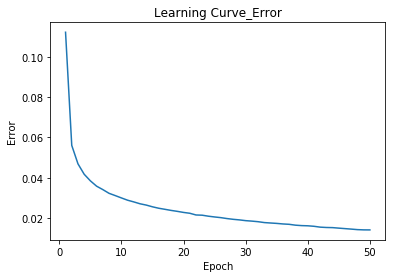

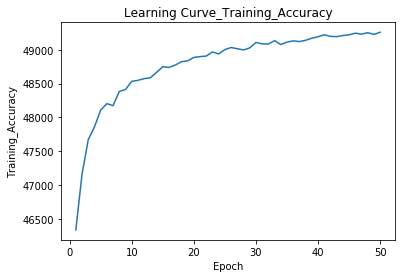

In [7]:
test_accuracy = []
#train your network 
val_accuracies = my_mnist_net.train(training_data,validation_data)
#save your model in Models/ using a distinguishing name for your model (architecture, learning rate, etc...)

In [8]:
my_mnist_net.save('saved_models/NN_MNIST_default_params')
test_accuracy.append(my_mnist_net.predict(test_data)/100)
print('Test_Accuracy  %-2.2f' % test_accuracy[-1])


Test_Accuracy  96.07


We obtain a test accuracy of 96%, which is a very decent result.  Especially the test accuracy is just 2% less  than the training accuracy, wich means that we did not overfit the model. The validation accuracy also follows the trend of the training accuracy.

<b>Question 2.1.4</b>: Guess digit, Implement and test a python function that predict the class of a digit (the folder images_test contains some examples of images of digits)


In [9]:
#Your implementation goes here

#DON'T KNOW HOW TO READ THE IMG
import os
from scipy import misc
def guess_digit(nn, sample):
    prediction = nn.feedForward(sample)
    return np.argmax(prediction)

dirname = 'Images_test'

for image in os.listdir(dirname):
    data = misc.imread(os.path.join(dirname, image), flatten=True)
    resized = misc.imresize(data, (28,28))
    print(guess_digit(my_mnist_net, resized))

5
5
3


The training has been made on images that have a black background and a white digit, in the folder *Images_test* only one picture respects that format, that's the main reason of the wrong classification. A possible solution is to recognize the images with a white background (histogram of colors) and invert the colors feeding them into the prediction procedure.

<b>Part 2</b>: Change the neural network structure and parameters to optimize performance

<b> Question 2.2.1</b>: Change the learning rate (0.001, 0.1, 1.0 , 10). Train the new neural nets with the original specifications (Part 2.1), for 50 iterations. 
Plot test accuracy vs iteration for each learning rate on the same graph. Report the maximum
test accuracy achieved for each learning rate. Which one achieves the maximum test accuracy?

Iteration:  1/50[==============] -Error: 0.5148340507  -Training_Accuracy:  11.75  -time: 36.50 
Validation accuracy 11.83
Iteration:  2/50[==============] -Error: 0.4411256002  -Training_Accuracy:  26.72  -time: 74.22 
Validation accuracy 27.339999999999996
Iteration:  3/50[==============] -Error: 0.4195128437  -Training_Accuracy:  30.29  -time: 112.64 
Validation accuracy 30.19
Iteration:  4/50[==============] -Error: 0.3850714665  -Training_Accuracy:  42.61  -time: 154.43 
Validation accuracy 41.980000000000004
Iteration:  5/50[==============] -Error: 0.3464431099  -Training_Accuracy:  57.47  -time: 193.38 
Validation accuracy 57.989999999999995
Iteration:  6/50[==============] -Error: 0.3082212685  -Training_Accuracy:  64.36  -time: 233.46 
Validation accuracy 65.27
Iteration:  7/50[==============] -Error: 0.2726447611  -Training_Accuracy:  69.91  -time: 270.59 
Validation accuracy 70.67
Iteration:  8/50[==============] -Error: 0.2425447972  -Training_Accuracy:  75.33  -time: 308.1

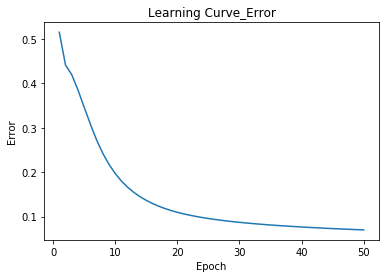

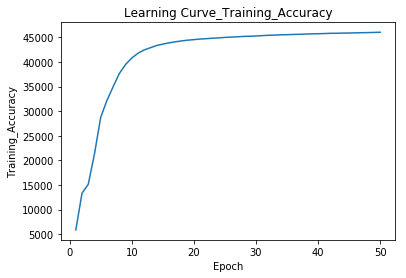

Learning rate 0.001000, Test_Accuracy  92.81


In [10]:
#Your implementation with a learning rate of 0.001 goes here 

learning_rate = 0.001

my_mnist_net_1 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate=learning_rate)
val_accuracies_1 = my_mnist_net_1.train(training_data,validation_data)
test_accuracy.append(my_mnist_net_1.predict(test_data)/100)

print('Learning rate %f, Test_Accuracy  %-2.2f' % (learning_rate, test_accuracy[-1]))

my_mnist_net_1.save('saved_models/NN_MNIST_0-001')

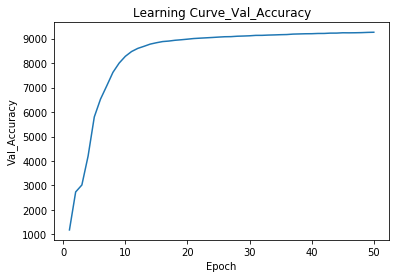

In [11]:
plot_curve(range(1,my_mnist_net_1.iterations+1), val_accuracies_1, "Val_Accuracy")

Iteration:  1/50[==============] -Error: 0.0862356325  -Training_Accuracy:  92.92  -time: 36.89 
Validation accuracy 93.03
Iteration:  2/50[==============] -Error: 0.0599729304  -Training_Accuracy:  93.62  -time: 76.06 
Validation accuracy 93.19
Iteration:  3/50[==============] -Error: 0.0536076778  -Training_Accuracy:  94.48  -time: 119.15 
Validation accuracy 93.74
Iteration:  4/50[==============] -Error: 0.0499437011  -Training_Accuracy:  94.27  -time: 156.78 
Validation accuracy 93.95
Iteration:  5/50[==============] -Error: 0.0479279663  -Training_Accuracy:  94.40  -time: 194.73 
Validation accuracy 93.96
Iteration:  6/50[==============] -Error: 0.0453834845  -Training_Accuracy:  94.10  -time: 232.20 
Validation accuracy 93.78999999999999
Iteration:  7/50[==============] -Error: 0.0446461275  -Training_Accuracy:  95.25  -time: 271.64 
Validation accuracy 94.73
Iteration:  8/50[==============] -Error: 0.0416390341  -Training_Accuracy:  95.47  -time: 311.79 
Validation accuracy 94.9

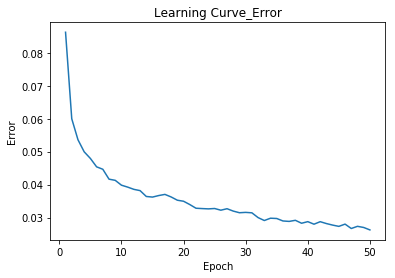

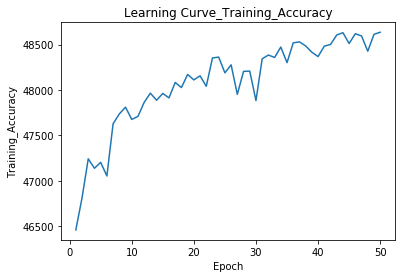

Learning rate 1.000000, Test_Accuracy  95.70


In [12]:
#Your implementation with a learning rate of 1.0 goes here 

learning_rate = 1.0

my_mnist_net_2 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate=learning_rate)
val_accuracies_2 = my_mnist_net_2.train(training_data,validation_data)
test_accuracy.append(my_mnist_net_2.predict(test_data)/100)

print('Learning rate %f, Test_Accuracy  %-2.2f' % (learning_rate, test_accuracy[-1]))

my_mnist_net_2.save('saved_models/NN_MNIST_1-00')


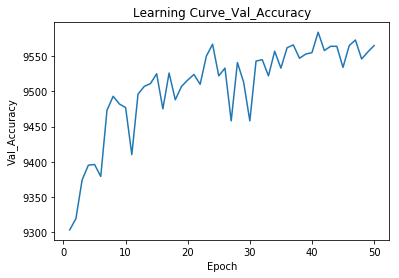

In [13]:
plot_curve(range(1,my_mnist_net_2.iterations+1), val_accuracies_2, "Val_Accuracy")

Iteration:  1/50[==============] -Error: 0.4882105748  -Training_Accuracy:  31.90  -time: 38.77 
Validation accuracy 32.550000000000004
Iteration:  2/50[==============] -Error: 0.4610481917  -Training_Accuracy:  22.89  -time: 78.49 
Validation accuracy 23.22
Iteration:  3/50[==============] -Error: 0.4541295311  -Training_Accuracy:  23.29  -time: 119.98 
Validation accuracy 23.44
Iteration:  4/50[==============] -Error: 0.4559398002  -Training_Accuracy:  19.43  -time: 159.80 
Validation accuracy 19.54
Iteration:  5/50[==============] -Error: 0.4582842583  -Training_Accuracy:  17.55  -time: 197.89 
Validation accuracy 17.76
Iteration:  6/50[==============] -Error: 0.4663215677  -Training_Accuracy:  17.99  -time: 238.03 
Validation accuracy 17.59
Iteration:  7/50[==============] -Error: 0.4578936873  -Training_Accuracy:  18.38  -time: 277.43 
Validation accuracy 18.23
Iteration:  8/50[==============] -Error: 0.4577466750  -Training_Accuracy:  20.32  -time: 321.00 
Validation accuracy 19.

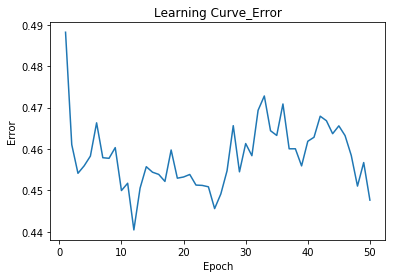

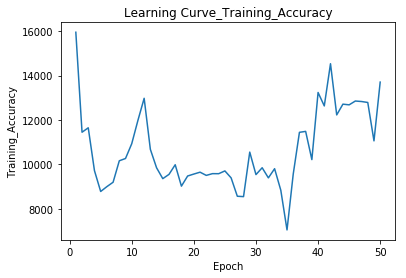

Learning rate 10.000000, Test_Accuracy  27.43


In [14]:
#Your implementation with a learning rate of 10 goes here 
learning_rate = 10

my_mnist_net_3 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate=learning_rate)
val_accuracies_3 = my_mnist_net_3.train(training_data,validation_data)
test_accuracy.append(my_mnist_net_3.predict(test_data)/100)
print('Learning rate %f, Test_Accuracy  %-2.2f' % (learning_rate, test_accuracy[-1]))
my_mnist_net_3.save('saved_models/NN_MNIST_10-0')

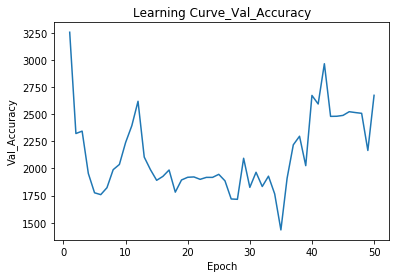

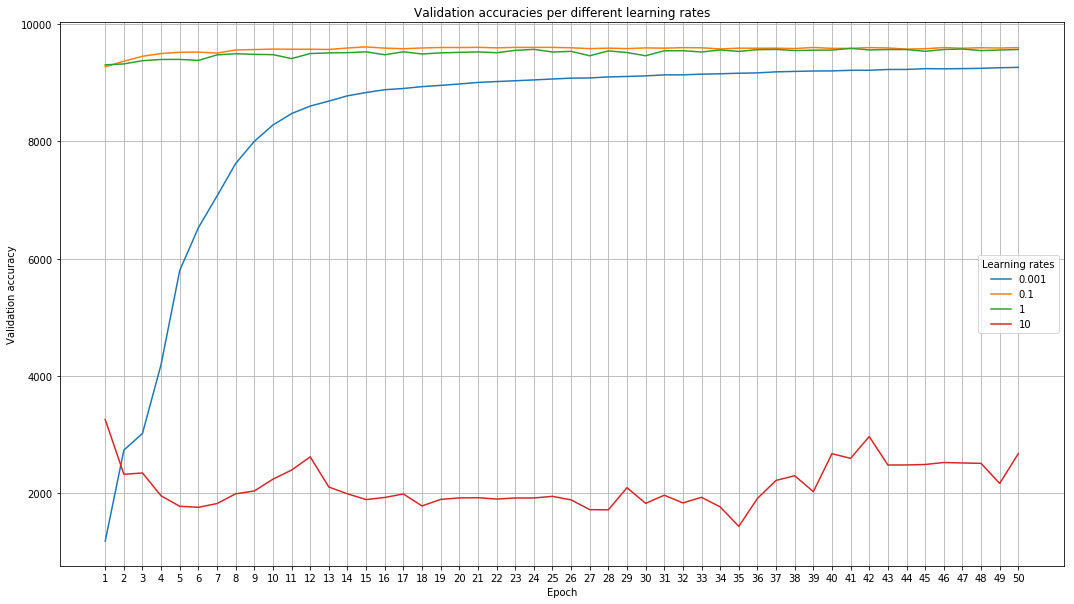

Best learning rate = 0.100000


In [32]:
plot_curve(range(1,my_mnist_net_3.iterations+1), val_accuracies_3, "Val_Accuracy")


#plotting different validation accuracies in the same plot
x = np.arange(1,51)
plt.figure(figsize=(18,10))
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracies per different learning rates')
plt.xticks(x)
plt.grid()
plt.plot(x,val_accuracies_1, label=0.001)
plt.plot(x,val_accuracies, label=0.1)
plt.plot(x,val_accuracies_2, label=1)
plt.plot(x,val_accuracies_3, label=10)
plt.legend(title="Learning rates")
plt.show()

rates = [0.1, 0.001, 1, 10]

best_rate = rates[np.argmax(test_accuracy)]
print("Best learning rate = %f" % (best_rate))

<h3>Comment</h3>
Increasing the learning rate increases the step size at which our weights get updated. From the plot above we can see very well that the learning rates 0.1 and 1 produce the best validation accuracies. However, the 0.1 learning rate converges the fastest and also produces the best test accuracy. Therefore, we consider it the best parameter value. A learning rate of 10 is definitely too high. The validation accuracy does not improve, instead it keeps fluctuating. This is because the weight updates do not properly follow the gradient direction towards the ground of small "valleys" on the error surface. We either "jump" across them or we keep on bouncing back and forth inside the valley.

 <b> Question 2.2.2 : </b> initialize all weights to 0.  Plot the training accuracy curve.
Comment your results
    
        

Iteration:  1/50[==============] -Error: 0.3944418670  -Training_Accuracy:  49.30  -time: 42.47 
Validation accuracy 50.019999999999996
Iteration:  2/50[==============] -Error: 0.3002768536  -Training_Accuracy:  55.65  -time: 86.71 
Validation accuracy 55.769999999999996
Iteration:  3/50[==============] -Error: 0.2888264688  -Training_Accuracy:  57.87  -time: 127.11 
Validation accuracy 58.040000000000006
Iteration:  4/50[==============] -Error: 0.2849249187  -Training_Accuracy:  58.58  -time: 169.63 
Validation accuracy 57.9
Iteration:  5/50[==============] -Error: 0.2829657162  -Training_Accuracy:  56.35  -time: 207.85 
Validation accuracy 56.230000000000004
Iteration:  6/50[==============] -Error: 0.2818992711  -Training_Accuracy:  58.64  -time: 244.12 
Validation accuracy 58.45
Iteration:  7/50[==============] -Error: 0.2809120987  -Training_Accuracy:  59.07  -time: 281.01 
Validation accuracy 59.07
Iteration:  8/50[==============] -Error: 0.2802082076  -Training_Accuracy:  56.55  

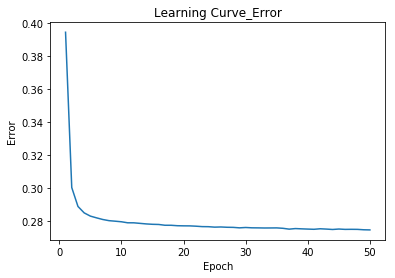

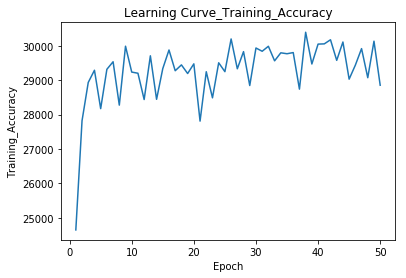

Test_Accuracy [zeros]  57.12


In [25]:
#Your implementation goes here
my_mnist_net_zeros = NeuralNetwork(input_nodes, hidden_nodes, output_nodes)

input_hidden_weights = np.zeros((my_mnist_net_zeros.input, my_mnist_net_zeros.hidden-1))
hidden_output_weights = np.zeros((my_mnist_net_zeros.hidden, my_mnist_net_zeros.output))

my_mnist_net_zeros.weights_initialisation(input_hidden_weights, hidden_output_weights)

validation_zeros = my_mnist_net_zeros.train(training_data,validation_data)
test_accuracy_zeros = my_mnist_net_zeros.predict(test_data)/100
print('Test_Accuracy [zeros]  %-2.2f' % (test_accuracy_zeros))
my_mnist_net_zeros.save('saved_models/NN_MNIST_DEFAULT_0s')

The test accuracy is very low (57.12%). This is because symmetric weight upates prevent the network from learning. Weights need to be randomized to break this symmetrie.

<b> Question 2.2.3 : </b> Try with a different transfer function (such as tanh).
 File transfer_functions.py provides you the python implementation of the tanh function and its derivative

Iteration:  1/50[==============] -Error: 0.5085838336  -Training_Accuracy:  73.41  -time: 31.80 
Validation accuracy 72.66
Iteration:  2/50[==============] -Error: 0.3673537104  -Training_Accuracy:  78.88  -time: 64.40 
Validation accuracy 78.7
Iteration:  3/50[==============] -Error: 0.3059682351  -Training_Accuracy:  88.76  -time: 97.30 
Validation accuracy 89.38000000000001
Iteration:  4/50[==============] -Error: 0.2895039859  -Training_Accuracy:  87.79  -time: 130.99 
Validation accuracy 87.59
Iteration:  5/50[==============] -Error: 0.2715567574  -Training_Accuracy:  88.96  -time: 163.68 
Validation accuracy 89.21
Iteration:  6/50[==============] -Error: 0.2652897194  -Training_Accuracy:  66.59  -time: 196.75 
Validation accuracy 66.8
Iteration:  7/50[==============] -Error: 0.2572294795  -Training_Accuracy:  74.73  -time: 230.36 
Validation accuracy 75.26
Iteration:  8/50[==============] -Error: 0.2541554068  -Training_Accuracy:  89.70  -time: 263.16 
Validation accuracy 89.96
I

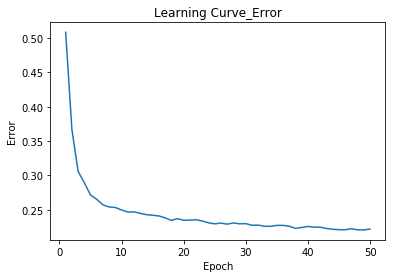

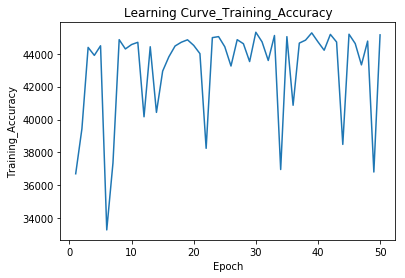

Test_Accuracy [tanh]  89.57


In [26]:
#Your implementation goes here

my_mnist_net_tanh = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, transfer='tanh')
#Your implementation goes here
validaion_tanh = my_mnist_net_tanh.train(training_data,validation_data)
test_accuracy_tanh = my_mnist_net_tanh.predict(test_data)/100
print('Test_Accuracy [tanh]  %-2.2f' % (test_accuracy_tanh))
my_mnist_net_zeros.save('saved_models/NN_MNIST_DEFAULT_tanh')

The range of values of *tanh* is (-1, 1) but our labels are only 0 and 1. Therefore, the labels only cover a part a part of the image of the tanh function. To be precise, training our network with 0,1 labels constraints the activation at the output layer to be positive in order to produce an output between 0 and 1. This also implies a constraint on the respective weights that now cannot be set as freely as with a sigmoid activation. A smaller search space on the optimal weight values results in a worse performance on the test accuracy (we lose about 5%).


<b> Question 2.2.4 : </b>  Add more neurons in the hidden layer (try with 100, 200, 300). Plot the curve representing the validation accuracy versus the number of neurons in the hidden layer.  (Choose and justify other hyper-parameters)

Iteration:  1/50[==============] -Error: 0.1042457508  -Training_Accuracy:  93.05  -time: 58.60 
Validation accuracy 93.13
Iteration:  2/50[==============] -Error: 0.0506479369  -Training_Accuracy:  95.28  -time: 118.03 
Validation accuracy 95.12
Iteration:  3/50[==============] -Error: 0.0393141904  -Training_Accuracy:  96.11  -time: 177.83 
Validation accuracy 95.71
Iteration:  4/50[==============] -Error: 0.0326241688  -Training_Accuracy:  96.57  -time: 236.81 
Validation accuracy 95.69
Iteration:  5/50[==============] -Error: 0.0279573126  -Training_Accuracy:  97.37  -time: 296.95 
Validation accuracy 96.6
Iteration:  6/50[==============] -Error: 0.0245479952  -Training_Accuracy:  97.77  -time: 356.59 
Validation accuracy 96.87
Iteration:  7/50[==============] -Error: 0.0219899221  -Training_Accuracy:  98.01  -time: 418.70 
Validation accuracy 97.00999999999999
Iteration:  8/50[==============] -Error: 0.0196508788  -Training_Accuracy:  98.21  -time: 480.62 
Validation accuracy 97.1

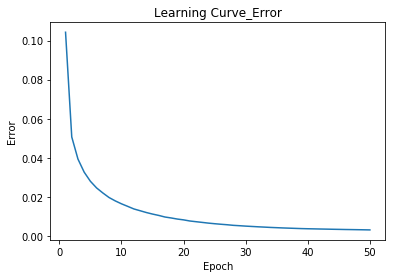

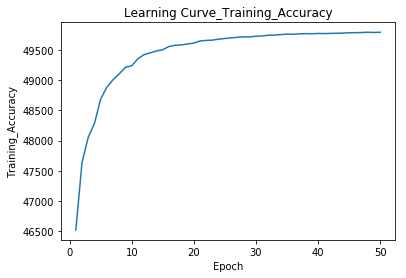

9782.0
Iteration:  1/50[==============] -Error: 0.1059214423  -Training_Accuracy:  93.17  -time: 99.31 
Validation accuracy 93.34
Iteration:  2/50[==============] -Error: 0.0515270623  -Training_Accuracy:  94.86  -time: 201.57 
Validation accuracy 94.71000000000001
Iteration:  3/50[==============] -Error: 0.0383784849  -Training_Accuracy:  96.42  -time: 301.74 
Validation accuracy 96.1
Iteration:  4/50[==============] -Error: 0.0307268811  -Training_Accuracy:  97.01  -time: 404.04 
Validation accuracy 96.46000000000001
Iteration:  5/50[==============] -Error: 0.0258218786  -Training_Accuracy:  97.77  -time: 503.86 
Validation accuracy 97.06
Iteration:  6/50[==============] -Error: 0.0223467948  -Training_Accuracy:  98.03  -time: 608.22 
Validation accuracy 97.25
Iteration:  7/50[==============] -Error: 0.0195369628  -Training_Accuracy:  98.25  -time: 707.75 
Validation accuracy 97.18
Iteration:  8/50[==============] -Error: 0.0172501375  -Training_Accuracy:  98.52  -time: 810.36 
Valid

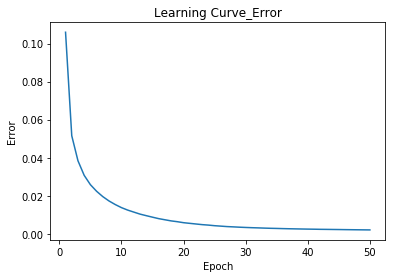

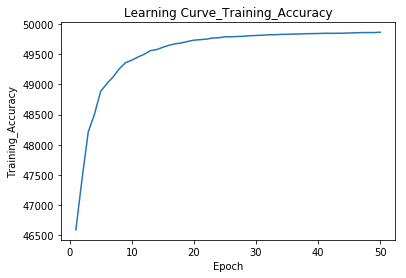

9812.0
Iteration:  1/50[==============] -Error: 0.1109705403  -Training_Accuracy:  92.29  -time: 147.58 
Validation accuracy 92.28
Iteration:  2/50[==============] -Error: 0.0539136829  -Training_Accuracy:  94.95  -time: 294.49 
Validation accuracy 94.92
Iteration:  3/50[==============] -Error: 0.0390772051  -Training_Accuracy:  96.41  -time: 441.84 
Validation accuracy 96.3
Iteration:  4/50[==============] -Error: 0.0312298663  -Training_Accuracy:  97.10  -time: 589.34 
Validation accuracy 96.57
Iteration:  5/50[==============] -Error: 0.0259170025  -Training_Accuracy:  97.72  -time: 737.00 
Validation accuracy 97.02
Iteration:  6/50[==============] -Error: 0.0222465027  -Training_Accuracy:  97.97  -time: 885.89 
Validation accuracy 97.08
Iteration:  7/50[==============] -Error: 0.0192613549  -Training_Accuracy:  98.24  -time: 1032.69 
Validation accuracy 97.32
Iteration:  8/50[==============] -Error: 0.0171085852  -Training_Accuracy:  98.57  -time: 1178.98 
Validation accuracy 97.570

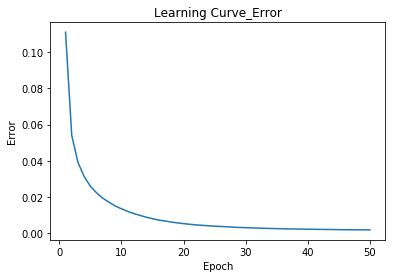

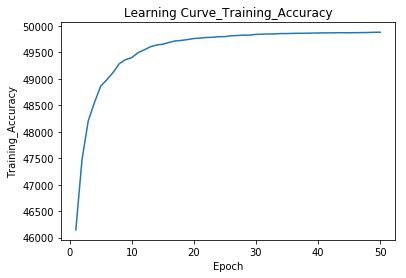

9824.0


In [27]:
#Your implementation goes here

learning_rate = best_rate
#using the best rate found before
my_mnist_net_100_hidden = NeuralNetwork(input_nodes, 100, output_nodes, learning_rate=learning_rate)
val_accuracies_100 = my_mnist_net_100_hidden.train(training_data,validation_data)
print(val_accuracies_100[-1])

my_mnist_net_200_hidden = NeuralNetwork(input_nodes, 200, output_nodes, learning_rate=learning_rate)
val_accuracies_200 = my_mnist_net_200_hidden.train(training_data,validation_data)
print(val_accuracies_200[-1])

my_mnist_net_300_hidden = NeuralNetwork(input_nodes, 300, output_nodes, learning_rate=learning_rate)
val_accuracies_300 = my_mnist_net_300_hidden.train(training_data,validation_data)
print(val_accuracies_300[-1])

In [33]:
my_mnist_net_100_hidden.save('saved_models/NN_MNIST_100_hidden_DEF')
my_mnist_net_200_hidden.save('saved_models/NN_MNIST_200_hidden_DEF')
my_mnist_net_300_hidden.save('saved_models/NN_MNIST_300_hidden_DEF')

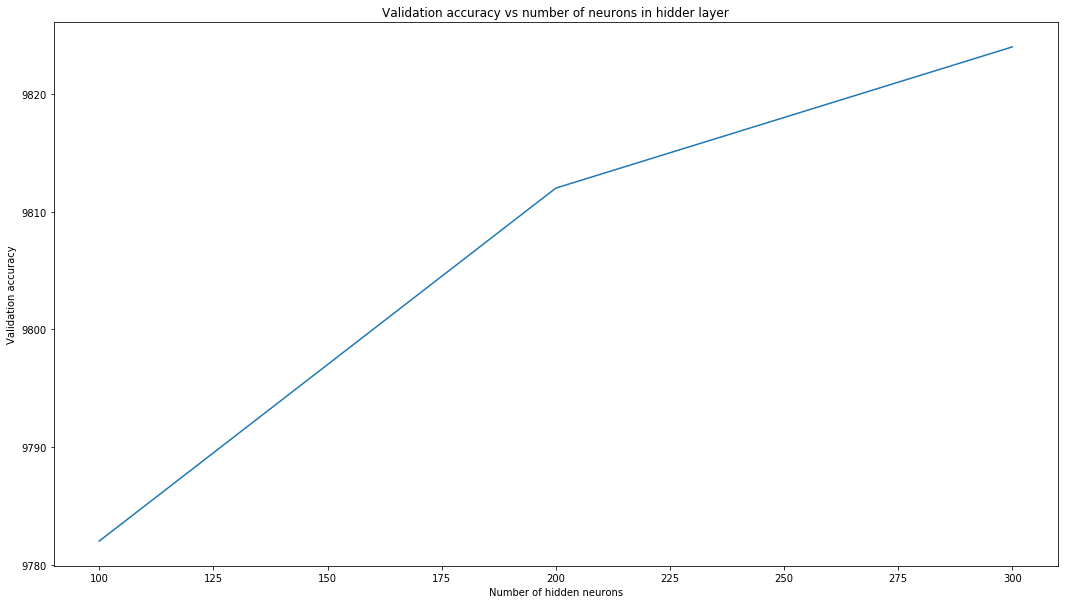

In [30]:
plt.figure(figsize=(18,10))
plt.xlabel("Number of hidden neurons")
plt.ylabel("Validation accuracy")
plt.title("Validation accuracy vs number of neurons in hidder layer")
plt.plot([100, 200, 300], [val_accuracies_100[-1], val_accuracies_200[-1], val_accuracies_300[-1]])
plt.show()

Looking at the plot above we can quickly see that 300 neurons perform the best among the tested configurations (the validation accuracy is the highest while the learning rate was left constant - the one that we found to be the best before).

<b> Question 2.2.5 : </b> Add one additionnal hidden layers and train your network, discuss your results with different setting. 



Iteration:  1/50[==============] -Error: 0.2794236659  -Training_Accuracy:  89.87  -time: 36.95 
Iteration:  2/50[==============] -Error: 0.0670139700  -Training_Accuracy:  93.49  -time: 79.16 
Iteration:  3/50[==============] -Error: 0.0490478529  -Training_Accuracy:  94.71  -time: 133.62 
Iteration:  4/50[==============] -Error: 0.0405936985  -Training_Accuracy:  95.80  -time: 172.40 
Iteration:  5/50[==============] -Error: 0.0356868360  -Training_Accuracy:  96.33  -time: 213.34 
Iteration:  6/50[==============] -Error: 0.0321592929  -Training_Accuracy:  96.70  -time: 254.66 
Iteration:  7/50[==============] -Error: 0.0295883383  -Training_Accuracy:  97.04  -time: 295.28 
Iteration:  8/50[==============] -Error: 0.0271886497  -Training_Accuracy:  96.89  -time: 338.94 
Iteration:  9/50[==============] -Error: 0.0255985267  -Training_Accuracy:  97.46  -time: 380.90 
Iteration: 10/50[==============] -Error: 0.0240409727  -Training_Accuracy:  97.52  -time: 421.49 
Iteration: 11/50[=====

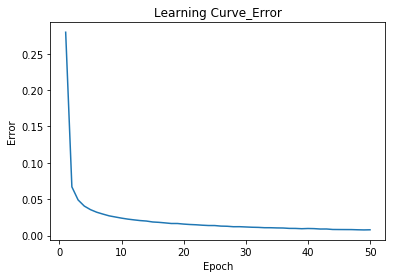

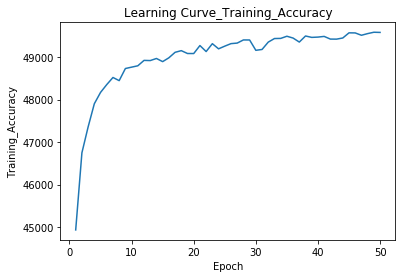

Accuracy with default learning rate = 96.450000
Iteration:  1/50[==============] -Error: 0.1434018567  -Training_Accuracy:  88.80  -time: 59.77 
Iteration:  2/50[==============] -Error: 0.0724579397  -Training_Accuracy:  92.87  -time: 133.23 
Iteration:  3/50[==============] -Error: 0.0614478681  -Training_Accuracy:  92.94  -time: 188.54 
Iteration:  4/50[==============] -Error: 0.0586879438  -Training_Accuracy:  93.03  -time: 251.20 
Iteration:  5/50[==============] -Error: 0.0550862141  -Training_Accuracy:  92.98  -time: 298.27 
Iteration:  6/50[==============] -Error: 0.0538291738  -Training_Accuracy:  93.58  -time: 359.54 
Iteration:  7/50[==============] -Error: 0.0518926217  -Training_Accuracy:  93.49  -time: 404.16 
Iteration:  8/50[==============] -Error: 0.0498259405  -Training_Accuracy:  93.39  -time: 450.08 
Iteration:  9/50[==============] -Error: 0.0473083150  -Training_Accuracy:  94.34  -time: 497.68 
Iteration: 10/50[==============] -Error: 0.0450449853  -Training_Accura

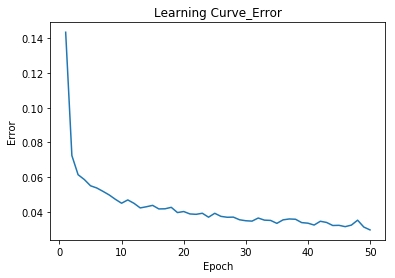

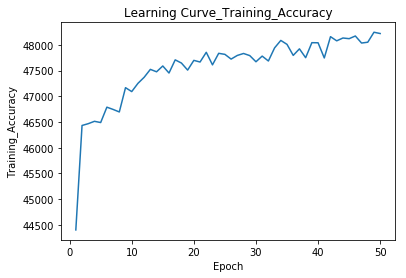

Learing rate = 1.000000, accuracy = 95.650000


In [31]:
#Your implementation goes here
from NeuralNetwork2 import NeuralNetwork2

#create the network

input_nodes = 784
hidden_nodes_1 = 30
hidden_nodes_2 = 30
output_nodes = 10

my_mnist_net = NeuralNetwork2(input_nodes, hidden_nodes_1, hidden_nodes_2, output_nodes)
val_acc_1 = my_mnist_net.train(training_data,validation_data)
acc_1 = my_mnist_net.predict(test_data)/100
print("Accuracy with default learning rate = %f" % acc_1)

learning_rate = 1
my_mnist_net_2 = my_mnist_net = NeuralNetwork2(input_nodes, hidden_nodes_1, hidden_nodes_2, output_nodes, learning_rate = learning_rate)
val_acc_2 = my_mnist_net_2.train(training_data, validation_data)
acc_2 = my_mnist_net_2.predict(test_data)/100
print("Learing rate = %f, accuracy = %f" % (learning_rate, acc_2))


In [34]:
my_mnist_net.save('saved_models/NN_MNIST_2_HIDDEN_LAYERS_DEF')
my_mnist_net_2.save('saved_models/NN_MNIST_2_HIDDEN_LAYERS_1-0')

Keeping the best learning rate from before (0.1) and adding an additional hidden layer that has the same shape as the one before, improves the test accuracy by around 0.4%. This result is still better than the one with a learning rate of 1.0. Therefore, we can say that adding one hidden layer only leads to a slight improvement in test accuracy in this particular case. For a learning rate of 1 the result even worsened by 0.05%. So for now, adding more neurons had a bigger impact than adding one additional layer. However, it remains to be seen what happens if we further increase the number of layers.